# 2. Problem nierównomierności klas
(jesli np mamy duzo wiecej 0 niz 1 na wyjsciu, celem jest wyrownanie klas)

https://svds.com/learning-imbalanced-classes/

Podejścia:

- "ważona" funkcja celu
- over-sampling (powielamy obserwacje ktorych jest mniej, w naszym przypadku powielamy jedynki)
- under-sampling (losujemy z wiekszosci tyle obserwacji ile jest w mniejszej, w naszym przypadku losujemy zera)
- data-augmentation (przede wszystkim przy pracy z obrazami) (dodanie nowych obrazkow przez obrot, odbicia, powiekszenia, pomniejszenia lub zaszumienie)
- podejścia inne niż klasyfikacja statystyczna (detekcja obserwacji nietypowych, własne heurystyki)

Zawsze można też manipulować progiem klasyfikacji.

Opis danych:

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount.

In [2]:
import pandas as pd

In [4]:
data = pd.read_csv('Dane/creditcard.csv')

In [11]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
import numpy as np

In [7]:
np.mean(data.Class)

0.001727485630620034

In [8]:
np.unique(data.Class, return_counts=True)

(array([0, 1]), array([284315,    492]))

In [12]:
data.drop("Time", axis=1, inplace=True)

In [14]:
import matplotlib.pyplot as plt

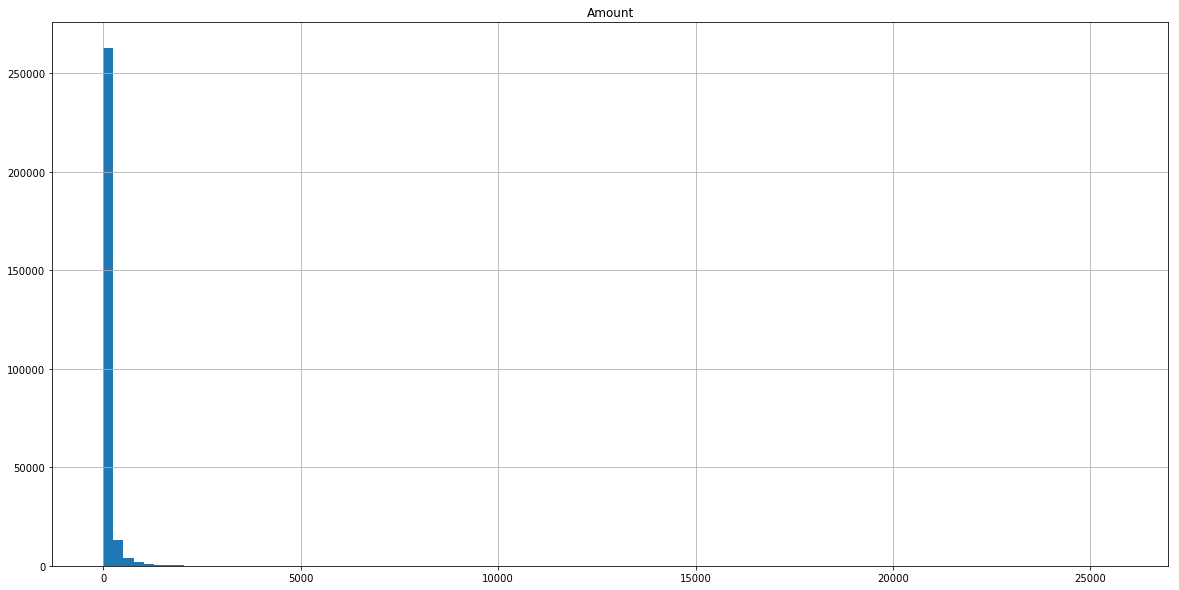

In [20]:
data.hist('Amount', bins=100, figsize=(20,10))
plt.show()

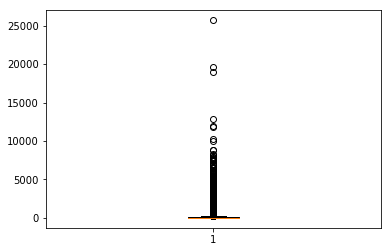

In [21]:
plt.boxplot(data.Amount)
plt.show()

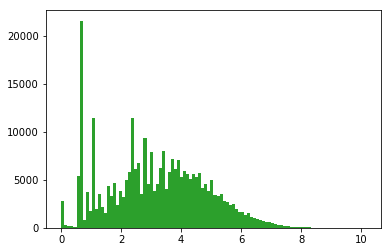

In [26]:
plt.hist(np.log(1+data.Amount), bins=100)
plt.show()

In [27]:
data['Amount'] = np.log(1 + data.Amount)

### Przygotowanie zbioru :

1. Co zrobić ze zmienną Time?

2. Przeanalizuj rozkład zmiennej Amount (w tym celu narysuj histogram oraz boxplot). Zaproponuj jest transformację.

In [28]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold

In [29]:
#cross_val_score vs cross_val_predict

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
X = data.drop('Class', axis=1)
y = data.Class

In [32]:
c = LogisticRegression()
preds = cross_val_predict(estimator=c, X=X, y=y, method='predict_proba', cv=StratifiedKFold(5))
preds

array([[  9.99187756e-01,   8.12244291e-04],
       [  9.99857003e-01,   1.42997098e-04],
       [  9.99522938e-01,   4.77062352e-04],
       ..., 
       [  9.99804625e-01,   1.95374623e-04],
       [  9.99187752e-01,   8.12247525e-04],
       [  9.99568441e-01,   4.31559440e-04]])

In [33]:
pred = preds[:,1]

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

In [35]:
roc_auc_score(y, pred)

0.96646180972123996

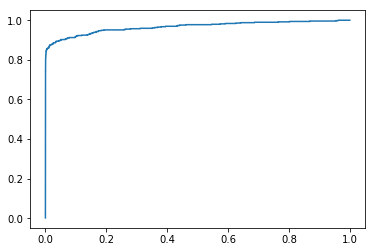

In [37]:
fpr, tpr, t = roc_curve(y, pred)
plt.plot(fpr, tpr)
plt.show()

In [39]:
c = LogisticRegression(class_weight={0:1, 1:100})
preds = cross_val_predict(estimator=c, X=X, y=y, method='predict_proba', cv=StratifiedKFold(5))[:,1]
roc_auc_score(y, preds)

0.95207480924412669

In [40]:
c = LogisticRegression(class_weight={0:1, 1:500})
preds = cross_val_predict(estimator=c, X=X, y=y, method='predict_proba', cv=StratifiedKFold(5))[:,1]
roc_auc_score(y, preds)

0.95079874620915283

In [41]:
# wagi pogorszyly score a mialy polepszyc

In [44]:
# sprawdzamy to samo dla drzewa decyzyjnego

In [42]:
from sklearn.tree import DecisionTreeClassifier
t = DecisionTreeClassifier()
preds = cross_val_predict(estimator=t, X=X, y=y, method='predict_proba', cv=StratifiedKFold(5))[:,1]
roc_auc_score(y, preds)

0.86835023460323757

In [45]:
t = DecisionTreeClassifier(class_weight={0:1, 1:100})
preds = cross_val_predict(estimator=t, X=X, y=y, method='predict_proba', cv=StratifiedKFold(5))[:,1]
roc_auc_score(y, preds)

0.83599521900377027

In [46]:
t = DecisionTreeClassifier(class_weight={0:1, 1:500})
preds = cross_val_predict(estimator=t, X=X, y=y, method='predict_proba', cv=StratifiedKFold(5))[:,1]
roc_auc_score(y, preds)

0.83400666399872236

### Zadanie: przetestuj undersamplig.

In [82]:
from copy import deepcopy
import random

def cross_validate_undersampling(X, Y, model, size=1, cv=StratifiedKFold(3,random_state=1)):
    
    """
    X - ramka danych
    Y - pd.Series
    size - określa stosunek liczby obserwacji klasy 0 do klasy 1 w zbiorze wynikowym
    """
    
    
    preds = []
    true_labels = []
    
    for train_index, test_index in cv.split(X,Y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    

        #ind0 = random.sample(y_train[y_train==0].index.values.tolist(), y_train[y_train==1].size)  # (size * liczba oserwacji klasy 1) losowych indeksów obserwacji klasy 0 (bez powtórzeń)
        ind0 = np.random.choice(np.where(y_train==0)[0], int(size * np.sum(y_train==1)), replace=False)
        #ind_final = np.r_[ind0, y_train[y_train==1].index.values.tolist()] # indeksy ind0 i indeksy klasy obserwacji (można wykorzystać np.r_[...])
        ind_final = np.r_[ind0, np.where(y_train==1)[0]]
        X_train_subsample = X_train.iloc[ind_final]
        y_train_subsample = y_train.iloc[ind_final]
        
        clf = deepcopy(model)
        clf.fit(X_train_subsample, y_train_subsample) # uczymy model stworzonym zbiorze
               
        preds.extend(clf.predict_proba(X_test)[:,1]) # prawdopodobienstwa na zbiorze testowym
        true_labels.extend(y_test)

    return roc_auc_score(true_labels, preds)

In [91]:
for model in [LogisticRegression(), DecisionTreeClassifier()]:
    for size in [1, 2, 5, 0.5]:
        print(cross_validate_undersampling(X[:200000], y[:200000], model, size))

0.964481601108
0.948566477482
0.944547702379
0.928693989176
0.883392576164
0.913188537285
0.929994590236
0.866421009795


### Zadanie: przetestuj oversampling. Napisz w tym celu funkcję analogiczną do funkcji testującej undersampling. Uwaga: obliczenia potrwają dłużej!

### Zadanie: przetestuj modyfikowany undersampling: k-krotnie dokonujemy predykcji przy użyciu undersamplingu, a następnie ostateczna predykcja to średnia z prawdopodobieństw k predykcji.

In [93]:
from copy import deepcopy
import random

def cross_validate_undersampling2(X, Y, model, size=1, cv=StratifiedKFold(3,random_state=1)):
    
    """
    X - ramka danych
    Y - pd.Series
    size - określa stosunek liczby obserwacji klasy 0 do klasy 1 w zbiorze wynikowym
    """
    
    n_estimators = 10
    preds = []
    true_labels = []
    
    for train_index, test_index in cv.split(X,Y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        scores = np.zeros((n_estimators, len(y_test)))
        for i in range(n_estimators):
            #ind0 = random.sample(y_train[y_train==0].index.values.tolist(), y_train[y_train==1].size)  # (size * liczba oserwacji klasy 1) losowych indeksów obserwacji klasy 0 (bez powtórzeń)
            ind0 = np.random.choice(np.where(y_train==0)[0], int(size * np.sum(y_train==1)), replace=False)
            #ind_final = np.r_[ind0, y_train[y_train==1].index.values.tolist()] # indeksy ind0 i indeksy klasy obserwacji (można wykorzystać np.r_[...])
            ind_final = np.r_[ind0, np.where(y_train==1)[0]]
            X_train_subsample = X_train.iloc[ind_final]
            y_train_subsample = y_train.iloc[ind_final]

            clf = deepcopy(model)
            clf.fit(X_train_subsample, y_train_subsample) # uczymy model stworzonym zbiorze

            scores[i,:] = clf.predict_proba(X_test)[:,1
                                                   ]
        preds.extend(scores.mean(0)) # prawdopodobienstwa na zbiorze testowym
        true_labels.extend(y_test)

    return roc_auc_score(true_labels, preds)

In [95]:
for model in [LogisticRegression(), DecisionTreeClassifier()]:
    for size in [1, 2, 5, 0.5]:
        print(cross_validate_undersampling2(X[:200000], y[:200000], model, size))

0.956601379734
0.969965052857
0.955569484244
0.964724015808
0.955971856213
0.961923397345
0.956639993026
0.965409731916


# Zadanie

Dane:
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

1) Przetwórz dane do postaci, którą przyjmą modele (zamień zmienne nominalne na mumeryczne - one-hot-encoding)

2) Podziel dane na zbiór uczący, walidacyjny i testowy z zachowaniem proporcji klas (google -> stratified train test split sklearn (można użyć dwukrotnie podziału na uczacy/testowy)) (test i walidacja po 5000 sampli)

3) Na zbiorze uczącym przy użyciu krowalidacji znajdź optymalne (miara f1) parametry modeli (gridsearchCV):

 - regresja logistyczna: type regularyzacji, współczynnik regularyzacji
 - drzewo decyzyjne: minimalna liczba obserwacji w liściu,
 - LDA (tylko parametey domyślne - przekazujemy grid search'owi pusty słownik)
 - QDA (tylko parametey domyślne - przekazujemy grid search'owi pusty słownik)
 - lasy losowe: liczba drzew
 - K najbliższych sąsiadów: liczba sąsiadów

 W tym celu:
 - stwórz listę modeli (listę wywołań konstruktorów z domyślnymi parametrami (postaci: [ KMeans(), ...] ))
 - stwórz listę siatek parametrów - jeden element listy to siatka parametrów (w postaci jakiej wymaga gridsearchCV) dla odpowiadającego modelu
 - przejdź pętlą po parach model,siatka (przyda się funkcja zip), wypisz w każdej iteracji wyniki (grid_scores_) kroswalidacji (przyda się funkcja pprint z modułu pprint) i zapisz w liście najlepsze parametry (.best\_params\_) dla każdego modelu

 Możesz poszerzyć siatki o inne parametry.


4) Przetestuj każdy model z najlepszymi parametrami na zbiorze validacyjnym, przechodząc pętlą po parach model,zestaw_najlepszych_parametrow (wykorzystaj operację \**_dict_ do nadania parametrów na podstawie słownika _dict_) i wypisz Accuracy, miarę F1 oraz AUC otrzymane na zbiorze walidacyjnym

5) Przetestuj na zbiorze validacyjnym "model warstwowy" względem zmiennej housing, konstruowany w następujący sposób: uczymy model (np. drzewo decyzyjne) w podgrupach wyznaczonych przez zmienną housing - tzn. uczymy jedno drzewo na podzbiorze, w którym housing=Yes, a drugie w podzbiorze housing=No. Następnie dokonujemy predykcji w taki sposób, że dla nowej obserwacji patrzymy na wartość zmiennej housing i w zależności od jej wartości dokonujemy predykcji drzewem nauczonym na odpowiednim podzbiorze.

6) Wykorzystanie analizy skupień w klasyfikacji. Zbadaj dwa podejścia:
  - Pogrupuj dane algorytmem k-średnich. Dodaj do danych zmienną NOMINALNĄ - kodowaną one-hot (nie numeryczną), której wartości są etykietami grupy obserwacji. Na danych rozszerzonych o tę zmienną powtórz punkty 3 i 4 (nie zmieniaj wcześniej przyjętych siatek parametrów). Przetestuj w kroswalidacji różne liczby skupień, a następnie przestestuja na zbiorze walidacyjnym kilka najlepszych modeli. UWAGA: pogrupowanie musi się odbyć na zbirze treningowym, natomiast wartości tej zmiennej na zbiorze walidacyjnym otrzymujemy przyporządowując obserwacje do najbliższych klastrów! [Zadanie z \*: wykonaj analogiczną procedurę dla grupowania hierarchicznego - w tym przypadku nie dysponujemy metodą predict - samemu trzeba zaimplementować przyporządkowywanie obserwacji do klastrów).
  - Pogrupuj dane algorytmem k-średnich. W każdym klastrze z osobna dopasuj model klasyfikacji (ten sam model uczony oddzielnie na każdym podzbiorze). Dokonuj predykcji obserwacji w następujący sposób: przypisz obserwację do najbliższego klastra, a następnie dokonaj predykcji przy użyciu modelu uczonego w tym klastrze.

7) Przetestuj over/under sampling

8) Przetestuj na zbiorze validacyjnym transformację danych przy użyciu PCA - powtórz stworzony do tej pory kod zmieniając go tak, aby na starcie zamiast inicjacji modeli były pipeliny PCA+Model. 
   

# 9) Oceń jakość działania pięciu najlepszych modeli/pipeline'ów na zbiorze testowym

10*) Spróbuj przetworzyć oryginalne zmienne do lepszej postaci. Powtórz cały proces w celu przetestowania wpływu sposobu przetworzenia danych. 


In [18]:
import pandas as pd
import numpy as np

In [2]:
bank = pd.read_csv('Dane/bank-full.csv', delimiter=';')

In [3]:
bank.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
bank.drop(['day', 'month', 'duration'], axis=1, inplace=True)

In [5]:
bank_d = pd.get_dummies(bank.drop('y', axis=1), drop_first=True)

In [6]:
bank_d.columns.values.size

29

In [7]:
bank_d

,age,balance,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,-1,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
1,44,29,1,-1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,33,2,1,-1,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,1
3,47,1506,1,-1,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
4,33,1,1,-1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
5,35,231,1,-1,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
6,28,447,1,-1,0,0,0,0,1,0,...,1,0,0,1,1,0,1,0,0,1
7,42,2,1,-1,0,0,1,0,0,0,...,1,0,1,1,0,0,1,0,0,1
8,58,121,1,-1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
9,43,593,1,-1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(bank_d)
standardized_X = scaler.transform(bank_d)
standardized_X

array([[ 1.60696496,  0.25641925, -0.56935064, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [ 0.28852927, -0.43789469, -0.56935064, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [-0.74738448, -0.44676247, -0.56935064, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       ..., 
       [ 2.92540065,  1.42959305,  0.72181052, ..., -0.20597248,
         5.37784754, -2.11631591],
       [ 1.51279098, -0.22802402,  0.39902023, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [-0.37068857,  0.52836436, -0.24656035, ...,  4.85501757,
        -0.185948  , -2.11631591]])

In [9]:
bank_s = pd.DataFrame(standardized_X, columns=bank_d.columns)
bank_s

,age,balance,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-0.569351,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,1.944270,-0.229600,...,1.548892,-0.206962,-0.135490,0.893915,-0.436803,-0.262091,1.572395,-0.205972,-0.185948,0.472519
1,0.288529,-0.437895,-0.569351,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,-0.514332,-0.229600,...,-0.645623,-0.206962,-0.135490,0.893915,-0.436803,-0.262091,1.572395,-0.205972,-0.185948,0.472519
2,-0.747384,-0.446762,-0.569351,-0.411453,-0.251940,-0.523740,5.422561,-0.16793,-0.514332,-0.229600,...,-0.645623,-0.206962,-0.135490,0.893915,2.289359,-0.262091,1.572395,-0.205972,-0.185948,0.472519
3,0.571051,0.047205,-0.569351,-0.411453,-0.251940,1.909346,-0.184415,-0.16793,-0.514332,-0.229600,...,-0.645623,4.831796,-0.135490,0.893915,-0.436803,-0.262091,1.572395,-0.205972,-0.185948,0.472519
4,-0.747384,-0.447091,-0.569351,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,-0.514332,-0.229600,...,-0.645623,4.831796,-0.135490,-1.118674,-0.436803,-0.262091,1.572395,-0.205972,-0.185948,0.472519
5,-0.559037,-0.371551,-0.569351,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,1.944270,-0.229600,...,1.548892,-0.206962,-0.135490,0.893915,-0.436803,-0.262091,1.572395,-0.205972,-0.185948,0.472519
6,-1.218254,-0.300608,-0.569351,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,1.944270,-0.229600,...,1.548892,-0.206962,-0.135490,0.893915,2.289359,-0.262091,1.572395,-0.205972,-0.185948,0.472519
7,0.100181,-0.446762,-0.569351,-0.411453,-0.251940,-0.523740,5.422561,-0.16793,-0.514332,-0.229600,...,1.548892,-0.206962,7.380625,0.893915,-0.436803,-0.262091,1.572395,-0.205972,-0.185948,0.472519
8,1.606965,-0.407679,-0.569351,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,-0.514332,4.355402,...,-0.645623,-0.206962,-0.135490,0.893915,-0.436803,-0.262091,1.572395,-0.205972,-0.185948,0.472519
9,0.194355,-0.252657,-0.569351,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,-0.514332,-0.229600,...,-0.645623,-0.206962,-0.135490,0.893915,-0.436803,-0.262091,1.572395,-0.205972,-0.185948,0.472519


In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X = bank_s
y = bank.y
X.shape, y.shape

((45211, 29), (45211,))

In [13]:
def split_table(table, labels=y,split = (0.78,0.11,0.11), seed = 42):
    '''Splits the table into train, validation and test sets.
       Returns a tuple (X_train, X_val, X_test, y_train, y_val, yest)'''

    # split into training set and the rest
    X_train, X_temp, y_train, y_temp = train_test_split(
        table, labels,
        test_size = 1 - split[0],
        random_state = seed, stratify = labels)

    # split the remaining data into validation and test sets
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,
        test_size = split[2]/(split[1]+split[2]), random_state = seed,
        stratify = y_temp)

    return X_train, X_val, X_test, y_train, y_val, y_test

In [14]:
X_train, X_val, X_test, y_train, y_val, y_test = split_table(X,y)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [16]:
models = [LogisticRegression(), \
          DecisionTreeClassifier(), \
          LinearDiscriminantAnalysis(), \
          QuadraticDiscriminantAnalysis(), \
          RandomForestClassifier(), \
          KNeighborsClassifier()]

In [28]:
params = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, \
         {'criterion': ["gini", "entropy"], 'max_depth': np.arange(1,10,3)}, \
         {'solver': ['svd', 'lsqr', 'eigen']}, \
         {}, \
         {}, \
         {"n_neighbors": np.arange(1,3)}]

In [29]:
for i in range(len(models)):
    print(i)
    grid = GridSearchCV(estimator=models[i], param_grid=params[i])
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    print(grid.best_estimator_)
    models[i] = grid.best_estimator_

0
<function _passthrough_scorer at 0x119463268>
{'C': 0.01}
0.892893602541
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
1
<function _passthrough_scorer at 0x119463268>
{'criterion': 'gini', 'max_depth': 1}
0.892638384755
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
2
<function _passthrough_scorer at 0x119463268>
{'solver': 'eigen'}
0.892610027223
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='eigen', store_covariance=False, tol=0.0001)
3
<function _passthrough_

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score

In [46]:
for i in range(len(models)):
    y_pred = models[i].predict(X_val)
    print(classification_report(y_val, y_pred))
    print('accuracy_score=', accuracy_score(y_val, y_pred))

             precision    recall  f1-score   support

         no       0.90      0.99      0.94      4391
        yes       0.66      0.17      0.27       582

avg / total       0.87      0.89      0.86      4973

accuracy_score= 0.892217977076
             precision    recall  f1-score   support

         no       0.90      0.99      0.94      4391
        yes       0.65      0.18      0.28       582

avg / total       0.87      0.89      0.86      4973

accuracy_score= 0.892620148804
             precision    recall  f1-score   support

         no       0.90      0.99      0.94      4391
        yes       0.64      0.18      0.29       582

avg / total       0.87      0.89      0.87      4973

accuracy_score= 0.89241906294
             precision    recall  f1-score   support

         no       0.92      0.88      0.90      4391
        yes       0.33      0.43      0.37       582

avg / total       0.85      0.83      0.84      4973

accuracy_score= 0.830886788659
             prec

In [49]:
for i in range(len(models)):
    y_pred = models[i].predict_proba(X_val)[:,1]
    print('roc_auc_score=', roc_auc_score(y_val=='yes', y_pred))

roc_auc_score= 0.757897675736
roc_auc_score= 0.584460873968
roc_auc_score= 0.752719167056
roc_auc_score= 0.734964559655
roc_auc_score= 0.684362578564
roc_auc_score= 0.618021984988


In [1]:
# rozwiazanie od norterta ze slacka
models = [LogisticRegression(),
         KNeighborsClassifier(),
         LinearDiscriminantAnalysis(),
         QuadraticDiscriminantAnalysis(),
         DecisionTreeClassifier(),
         RandomForestClassifier()]
param_grids = [{"penalty":["l1","l2"],"C":[0.1,1,10,100,1000,10000]},
             {"n_neighbors":[1,3,7,19]},
             {},
             {},
             {"min_samples_leaf":[5,10,25,50,100]},
             {"n_estimators":[10,100,300,500]}]

best_params = []
for model, grid in zip(models,param_grids):
   
   print(model)
   cv = GridSearchCV(model,grid,scoring="f1")
   cv.fit(X_train,y_train)
   best_params.append(cv.best_params_)
   pprint(cv.grid_scores_)
   
   

for mod, params in zip(models,best_params):

   model = deepcopy(mod)
   model.set_params(**params)
   model.fit(X_train,y_train)
   preds = model.predict_proba(X_val)[:,1]
   print(accuracy_score(y_val,preds>0.5), f1_score(y_val,preds>0.5), roc_auc_score(y_val,preds))